In [1]:
# System libraries
import sys, os, gc
import datetime

# Math libraries
import math, random
import pandas as pd, numpy as np
import scipy
from scipy import stats
from datetime import timedelta
from datetime import datetime
import itertools

# Data storage libraries
import pickle, sqlite3, simpledbf, boto3

# Custom financial data libraries
import findata_utils as fd
import ml_utils

# Plotting libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams

import warnings
#if not sys.warnoptions:
#    warnings.simplefilter("ignore")

from importlib import reload
fd = reload(fd)

import sklearn as sk
import tensorflow as tf
import xgboost as xgb
import keras

from imblearn.over_sampling import RandomOverSampler

from sklearn import svm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib 

from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

from yellowbrick.regressor import ResidualsPlot, PredictionError

# Connect to databases
db = 'C:\\Datasets\\thesis.db'
overleaf = ['C:','Users','bryce','OneDrive','Documents','Overleaf','5babbfe264c952737a9a5117','esc499']
conn = sqlite3.connect(db)
c = conn.cursor()

hdf_path = 'C:\\Datasets\\thesis.h5'
hdf = pd.HDFStore(hdf_path)

In [7]:
df = pd.read_sql('''
    SELECT *--ticker, date, rebal_date, action, [index], r_daily,
        --er_daily, ar_daily
    FROM daily_abnormal_returns''', conn)

In [49]:
vola = pd.read_sql('''SELECT * FROM vola''', conn)
vola = vola.merge(df[['rebal_date']].drop_duplicates(), left_on=['date'], right_on=['rebal_date'], how='left')
vola['rebal_day'] = vola['rebal_date'].apply(lambda vol: type(vol)==str)
vola['surprise'] = (vola['SPTSXIndex_3']-vola['SPTSXIndex_20'])

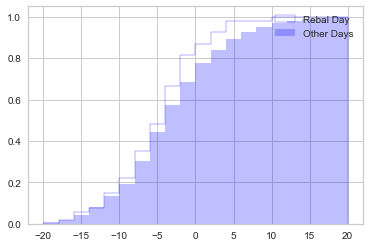

In [69]:
plt.hist(vola.loc[vola['rebal_day']]['surprise'], density=True, alpha=1, color='blue', bins=np.linspace(-20,20,21), histtype='step', cumulative=True)
plt.hist(vola.loc[~vola['rebal_day']]['surprise'], density=True, alpha=0.25, color='blue', bins=np.linspace(-20,20,21), histtype='stepfilled', cumulative=True)
plt.legend(['Rebal Day','Other Days'])
plt.show()